# Data Processing and Versioning

In [123]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sn
from azureml.core import Workspace, Dataset

In [124]:
# import dataset

df = pd.read_csv('Dataset/weather_dataset_raw.csv')

In [125]:
df.head()

,S_No,Timestamp,Location,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Weather_conditions
0,0,2006-04-01 00:00:00+02:00,"Port of Turku, Finland",9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,rain
1,1,2006-04-01 01:00:00+02:00,"Port of Turku, Finland",9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,rain
2,2,2006-04-01 02:00:00+02:00,"Port of Turku, Finland",9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,rain
3,3,2006-04-01 03:00:00+02:00,"Port of Turku, Finland",8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,NaN
4,4,2006-04-01 04:00:00+02:00,"Port of Turku, Finland",8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,rain


In [126]:
df.shape

(96453, 11)

In [127]:
df.dtypes

S_No                        int64
Timestamp                  object
Location                   object
Temperature_C             float64
Apparent_Temperature_C    float64
Humidity                  float64
Wind_speed_kmph           float64
Wind_bearing_degrees        int64
Visibility_km             float64
Pressure_millibars        float64
Weather_conditions         object
dtype: object

# a) Data quality assessment and processing

#### Check for missing data

In [128]:
df.isnull().values.any()

True

#### Fill missing data

In [129]:
df['Weather_conditions'].fillna(method='ffill',inplace=True,axis=0)

In [130]:
df.isnull().values.any()

False

In [131]:
df.Weather_conditions.value_counts()

rain     82271
snow     10712
clear     3470
Name: Weather_conditions, dtype: int64

In [132]:
df["Weather_conditions"].replace({"snow": "no_rain", "clear": "no_rain"}, inplace=True)

In [133]:
df.Weather_conditions.value_counts()

rain       82271
no_rain    14182
Name: Weather_conditions, dtype: int64

#### Convert Timestamp to Datetime format

In [134]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

#### Convert text data to numeric using Label Encoding

In [135]:
y = df['Weather_conditions']

In [136]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [137]:
y = pd.DataFrame(data=y, columns=["Weather_condition"])

In [138]:
df = pd.concat([df, y], axis=1)

In [139]:
df.Weather_condition.value_counts()

1    82271
0    14182
Name: Weather_condition, dtype: int64

In [140]:
df.drop(['Weather_conditions'],axis=1,inplace=True)

In [141]:
# Result - rain is 0 and no_rain is 1
df.head()

,S_No,Timestamp,Location,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Weather_condition
0,0,2006-04-01 00:00:00+02:00,"Port of Turku, Finland",9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,1
1,1,2006-04-01 01:00:00+02:00,"Port of Turku, Finland",9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,1
2,2,2006-04-01 02:00:00+02:00,"Port of Turku, Finland",9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,1
3,3,2006-04-01 03:00:00+02:00,"Port of Turku, Finland",8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,1
4,4,2006-04-01 04:00:00+02:00,"Port of Turku, Finland",8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,1


## b) Understanding Correlations between data (columns)

In [142]:
df.corr(method ='pearson')

,S_No,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Weather_condition
S_No,1.000000,0.025480,0.026612,0.041722,-0.006401,-0.027797,0.108975,0.016641,0.082974
Temperature_C,0.025480,1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.005447,0.378343
Apparent_Temperature_C,0.026612,0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.000219,0.383870
Humidity,0.041722,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.005454,-0.130953
Wind_speed_kmph,-0.006401,0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.049263,0.094136
Wind_bearing_degrees,-0.027797,0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.011651,0.059549
Visibility_km,0.108975,0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,0.059818,0.233369
Pressure_millibars,0.016641,-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000,0.040330
Weather_condition,0.082974,0.378343,0.383870,-0.130953,0.094136,0.059549,0.233369,0.040330,1.000000


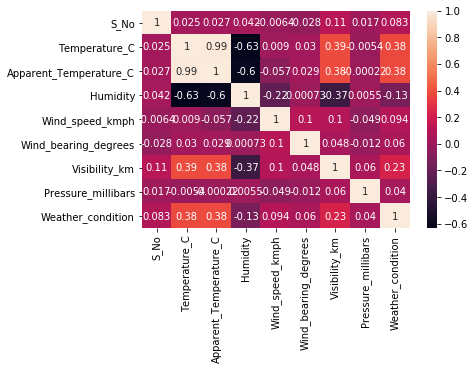

In [143]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

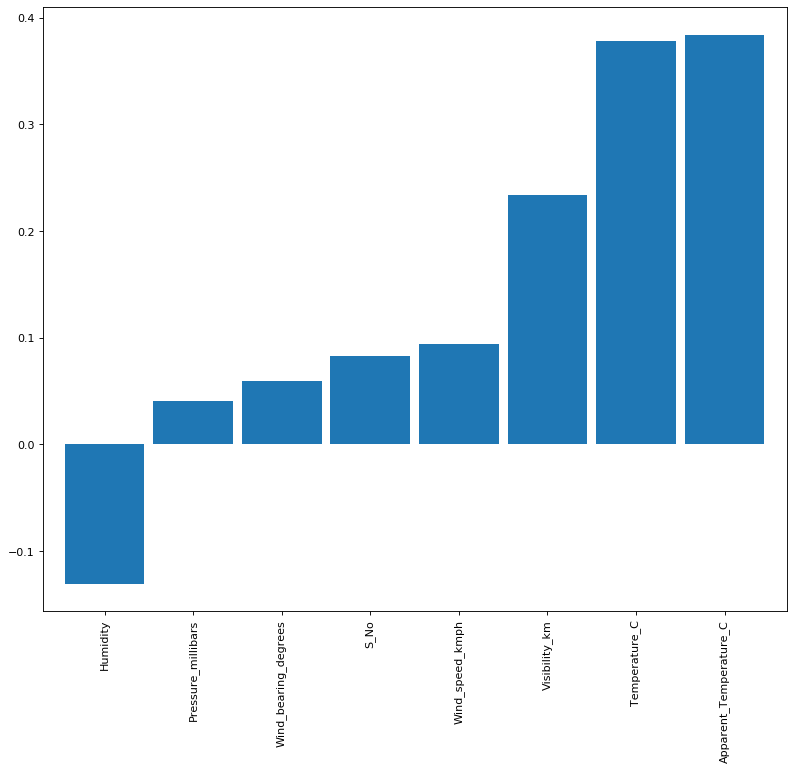

In [145]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='w')
df.corr(method ='pearson')['Weather_condition'].sort_values(ascending=True).drop(['Weather_condition']).plot(kind='bar', width=0.9)

## c) Drop unwanted data (columns)

In [146]:
df.drop(['S_No', 'Apparent_Temperature_C'],axis=1,inplace=True)

In [147]:
df.head()

,Timestamp,Location,Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Weather_condition
0,2006-04-01 00:00:00+02:00,"Port of Turku, Finland",9.472222,0.89,14.1197,251,15.8263,1015.13,1
1,2006-04-01 01:00:00+02:00,"Port of Turku, Finland",9.355556,0.86,14.2646,259,15.8263,1015.63,1
2,2006-04-01 02:00:00+02:00,"Port of Turku, Finland",9.377778,0.89,3.9284,204,14.9569,1015.94,1
3,2006-04-01 03:00:00+02:00,"Port of Turku, Finland",8.288889,0.83,14.1036,269,15.8263,1016.41,1
4,2006-04-01 04:00:00+02:00,"Port of Turku, Finland",8.755556,0.83,11.0446,259,15.8263,1016.51,1


## d) Timeseries analysis of Temperature

In [148]:
time = df['Timestamp']
temp = df['Temperature_C']

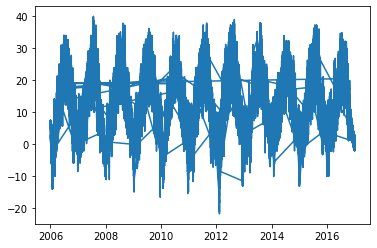

In [149]:
## plot graph
plt.plot(time, temp)
plt.show()

In [150]:
# Save processed dataset 
df.to_csv('Dataset/weather_dataset_processed.csv',index=False)

## Register dataset to the workspace

In [152]:
subscription_id = '6faa9ede-4786-48dc-9c1e-0262e2844ebf'
resource_group = 'Learn_MLOps'
workspace_name = 'MLOps_WS'

In [153]:
workspace = Workspace(subscription_id, resource_group, workspace_name)

In [154]:
# get the datastore to upload prepared data
datastore = workspace.get_default_datastore()

In [155]:
# upload the local file from src_dir to the target_path in datastore
datastore.upload(src_dir='Dataset', target_path='data')

Uploading an estimated of 4 files
Uploading Dataset/weather_dataset_raw.csv
Uploading Dataset/.DS_Store
Uploading Dataset/weather_dataset_processed.csv
Uploading Dataset/.ipynb_checkpoints/data_anal-checkpoint.ipynb
Uploaded Dataset/.DS_Store, 1 files out of an estimated total of 4
Uploaded Dataset/.ipynb_checkpoints/data_anal-checkpoint.ipynb, 2 files out of an estimated total of 4
Uploaded Dataset/weather_dataset_raw.csv, 3 files out of an estimated total of 4
Uploaded Dataset/weather_dataset_processed.csv, 4 files out of an estimated total of 4
Uploaded 4 files


$AZUREML_DATAREFERENCE_bd60133e58e34a62a9aca049b243f79e

In [156]:
dataset = Dataset.Tabular.from_delimited_files(datastore.path('data/weather_dataset_processed.csv'))

In [157]:
# preview the first 3 rows of the dataset from datastore
dataset.take(3).to_pandas_dataframe()

,Timestamp,Location,Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Weather_condition
0,2006-03-31 22:00:00,"Port of Turku, Finland",9.472222,0.89,14.1197,251,15.8263,1015.13,1
1,2006-03-31 23:00:00,"Port of Turku, Finland",9.355556,0.86,14.2646,259,15.8263,1015.63,1
2,2006-04-01 00:00:00,"Port of Turku, Finland",9.377778,0.89,3.9284,204,14.9569,1015.94,1


In [ ]:
# Register Dataset to workspace

In [158]:
weather_ds = dataset.register(workspace=workspace,
                                 name='weather_ds_portofTurku',
                                 description='full weather data')